<a href="https://colab.research.google.com/github/Jayakrishna2005/CSA4705deeplearning/blob/main/6_to_10_experiments_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6 experiment


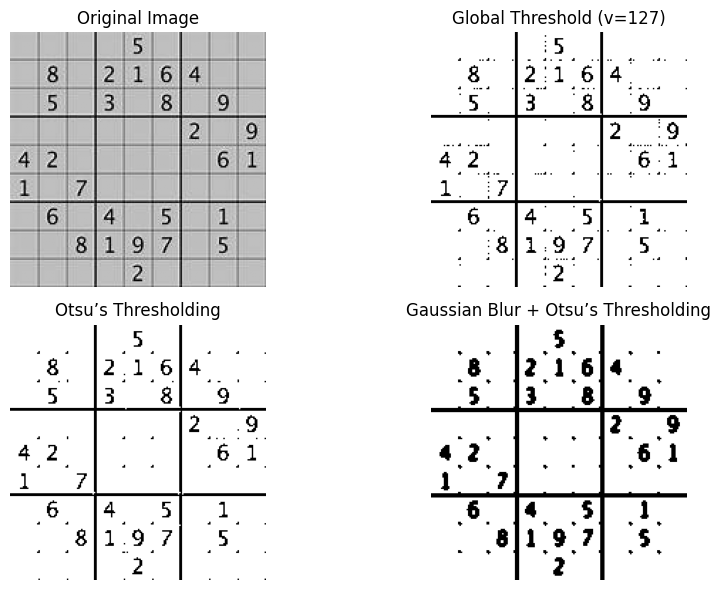

Manual Threshold Value: 127.0
Otsu’s Threshold (without blur): 119.0
Otsu’s Threshold (with Gaussian blur): 154.0


In [2]:


import cv2
import matplotlib.pyplot as plt

# Step 1: Load your image (grayscale)
img_path = '/content/sudoko1.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {img_path}")

# Step 2: Apply simple global thresholding (manual threshold = 127)
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Step 3: Apply Otsu’s thresholding (automatically computes threshold)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Apply Gaussian Blur + Otsu’s Thresholding (better performance)
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 5: Display results using matplotlib
titles = [
    'Original Image',
    'Global Threshold (v=127)',
    "Otsu’s Thresholding",
    "Gaussian Blur + Otsu’s Thresholding"
]
images = [img, th1, th2, th3]

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 6: Print the computed threshold values
print("Manual Threshold Value:", ret1)
print("Otsu’s Threshold (without blur):", ret2)
print("Otsu’s Threshold (with Gaussian blur):", ret3)


#7 image preprocess watershed algorithm


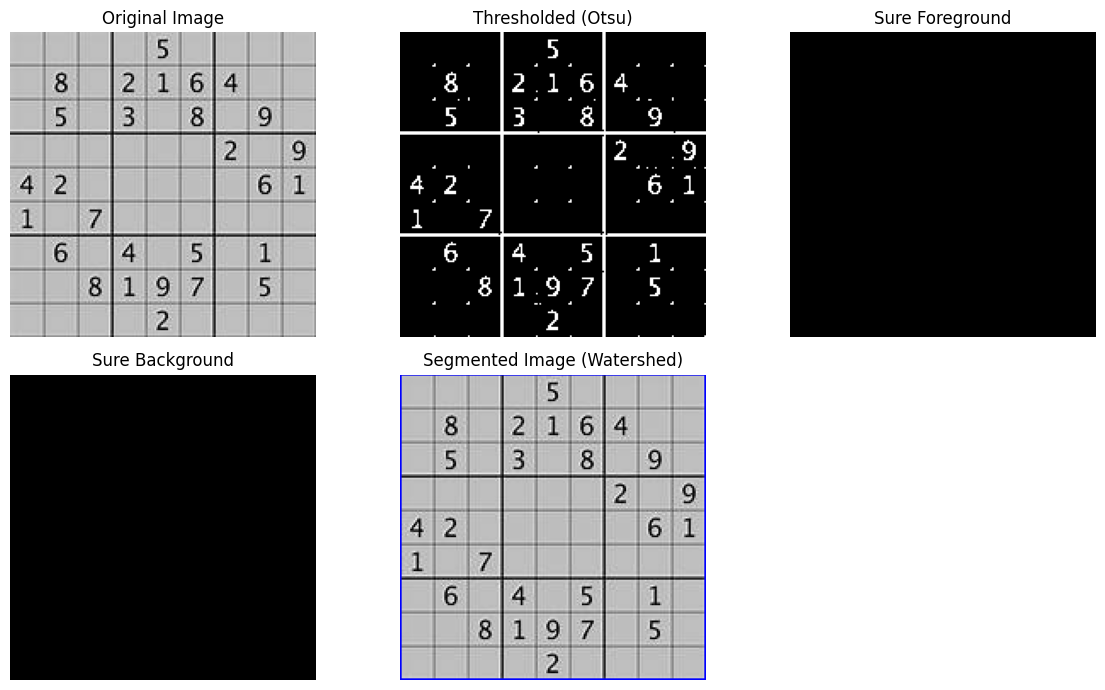

In [3]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load image
img_path = '/content/sudoko1.png'
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# Keep a copy for display
original = img.copy()

# Step 2: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Otsu’s thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 4: Remove noise using morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 5: Determine sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Step 6: Determine sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 7: Identify unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 8: Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so background is not 0
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Step 9: Apply watershed algorithm
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # mark boundaries in red

# Step 10: Display results
titles = [
    'Original Image',
    'Thresholded (Otsu)',
    'Sure Foreground',
    'Sure Background',
    'Segmented Image (Watershed)'
]
images = [original, thresh, sure_fg, sure_bg, img]

plt.figure(figsize=(12, 7))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


# 10 experiment linear regression

In [4]:
# Short Linear Regression Classifier Example
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict continuous outputs
y_pred_cont = model.predict(X_test)

# Convert to class labels (threshold 0.5)
y_pred = (y_pred_cont >= 0.5).astype(int)

# Show sample input, predicted output, and actual output
for i in range(5):
    print(f"Input features: {X_test[i][:5]} ...")  # first 5 features
    print(f"Predicted class: {y_pred[i]}, Actual class: {y_test[i]}\n")


Input features: [1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02] ...
Predicted class: 1, Actual class: 1

Input features: [1.894e+01 2.131e+01 1.236e+02 1.130e+03 9.009e-02] ...
Predicted class: 0, Actual class: 0

Input features: [1.546e+01 1.948e+01 1.017e+02 7.489e+02 1.092e-01] ...
Predicted class: 0, Actual class: 0

Input features: [1.240e+01 1.768e+01 8.147e+01 4.678e+02 1.054e-01] ...
Predicted class: 1, Actual class: 1

Input features: [1.154e+01 1.444e+01 7.465e+01 4.029e+02 9.984e-02] ...
Predicted class: 1, Actual class: 1



# 11 logistic regression


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, multi_class='auto')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


12 random forest

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a few sample inputs with predictions
print("\nSample Predictions:")
for i in range(5):
    print(f"Input features (first 5 values): {X_test[i][:5]} ...")
    print(f"Predicted class: {y_pred[i]}, Actual class: {y_test[i]}\n")


Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 59   4]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Sample Predictions:
Input features (first 5 values): [1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02] ...
Predicted class: 1, Actual class: 1

Input features (first 5 values): [1.894e+01 2.131e+01 1.236e+02 1.130e+03 9.009e-02] ...
Predicted class: 0, Actual class: 0

Input features (first 5 values): [1.546e+01 1.948e+01 1.017e+02 7.489e+02 1.092e-01] ...
Predicted class: 0, Actual class: 0

Input features (first 5 values): [1.240e+01 1.768e+01 8.147e+01 4.678e+02 1.054e-01] ...
Predicted class: 1, Actual class: 1

Input features (first 5 values): [1.154e+01 1.444e+01